In [122]:
pip install mglearn

In [123]:
pip install category_encoders

In [124]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn
import os
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.feature_extraction import DictVectorizer
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, ward 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Reading the data**

In [125]:
hrdata = pd.read_csv('/content/data_sets.csv')

print(hrdata)

       emp_class   gender                                 department  \
0        พนักงาน  เพศหญิง               Food & Beverage (Department)   
1     หัวหน้างาน  เพศหญิง               Food & Beverage (Department)   
2      ผู้จัดการ   เพศชาย               Food & Beverage (Department)   
3     หัวหน้างาน  เพศหญิง          Finance & Accounting (Department)   
4        พนักงาน  เพศหญิง                       Kitchen (Department)   
...          ...      ...                                        ...   
1048     พนักงาน   เพศชาย     Japanese Restaurant Group (Department)   
1049     พนักงาน   เพศชาย             IMPACT Lake Front (Department)   
1050  หัวหน้างาน   เพศชาย  Chinese Restaurant (Kitchen) (Department)   
1051     พนักงาน  เพศหญิง     Japanese Restaurant Group (Department)   
1052     พนักงาน  เพศหญิง             IMPACT Lake Front (Department)   

                             sub_division  \
0                                 Steward   
1                          Administration   


In [126]:
def table():

  data = np.c_[hrdata]

  return pd.DataFrame(data, columns=hrdata.columns.values)

table()

,emp_class,gender,department,sub_division,gspecial,jobtitle,rank,servstatus,age,expyears,mstatue,nkids,salary,degree,performance
0,พนักงาน,เพศหญิง,Food & Beverage (Department),Steward,Steward,Steward Attendant,10,พ้นสภาพ,61,22,โสด,1,12500,NaN,C
1,หัวหน้างาน,เพศหญิง,Food & Beverage (Department),Administration,Administration,Supervisor - F&B Admin,7,พ้นสภาพ,44,22,โสด,0,36534,ปริญญาตรี,C
2,ผู้จัดการ,เพศชาย,Food & Beverage (Department),Banquet - Support,Banquet - Support,Manager - Banquet Supporting,5,ปัจจุบัน,46,22,โสด,0,46746,ปริญญาตรี,B
3,หัวหน้างาน,เพศหญิง,Finance & Accounting (Department),Store,Store,Chief Store,6,พ้นสภาพ,59,22,โสด,0,61145,ปริญญาตรี,A
4,พนักงาน,เพศหญิง,Kitchen (Department),Preparation Kitchen,Preparation Kitchen,Commis II,10,พ้นสภาพ,53,21,โสด,0,11000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,พนักงาน,เพศชาย,Japanese Restaurant Group (Department),Tsubohachi - Kitchen (Nihonmachi),Tsubohachi - Kitchen (Nihonmachi),Commis II,10,พ้นสภาพ,31,4,โสด,0,11000,NaN,D
1049,พนักงาน,เพศชาย,IMPACT Lake Front (Department),ISAN@ARENA - Kitchen,ISAN@ARENA - Kitchen,Commis III,11,ปัจจุบัน,28,4,โสด,0,12600,NaN,B
1050,หัวหน้างาน,เพศชาย,Chinese Restaurant (Kitchen) (Department),Chinese Banquet Kitchen,Chinese Banquet Kitchen,Chopper II,7,พ้นสภาพ,27,4,โสด,0,23000,ปริญญาตรี,C
1051,พนักงาน,เพศหญิง,Japanese Restaurant Group (Department),Tsubohachi - Service(The Promenade),Tsubohachi - Service(The Promenade),Service,10,ปัจจุบัน,23,4,โสด,0,11550,NaN,B


In [127]:
def count_table():
    creditcount = table()
    
    index = ['A', 'B','C','D']

    A = np.where(creditcount['performance'] == 'A');

    B = np.where(creditcount['performance'] == 'B');
    
    C = np.where(creditcount['performance'] == 'C');

    D = np.where(creditcount['performance'] == 'D');

    data = [np.shape(A)[1], np.shape(B)[1], np.shape(C)[1], np.shape(D)[1]]

    series = pd.Series(data, index=index)

    return series
    
count_table()

A    110
B    421
C    431
D     91
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


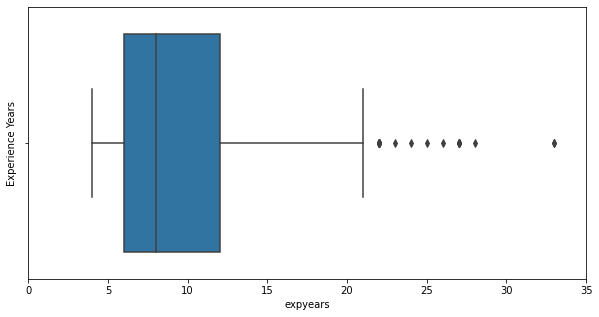

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


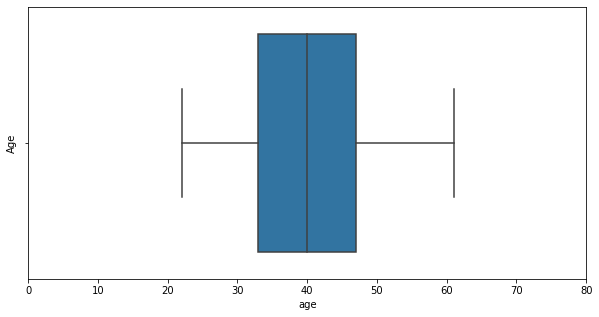

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


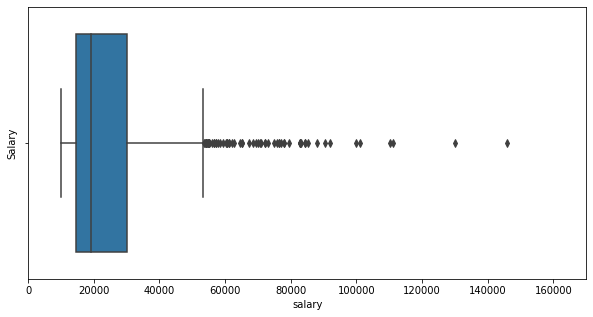

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


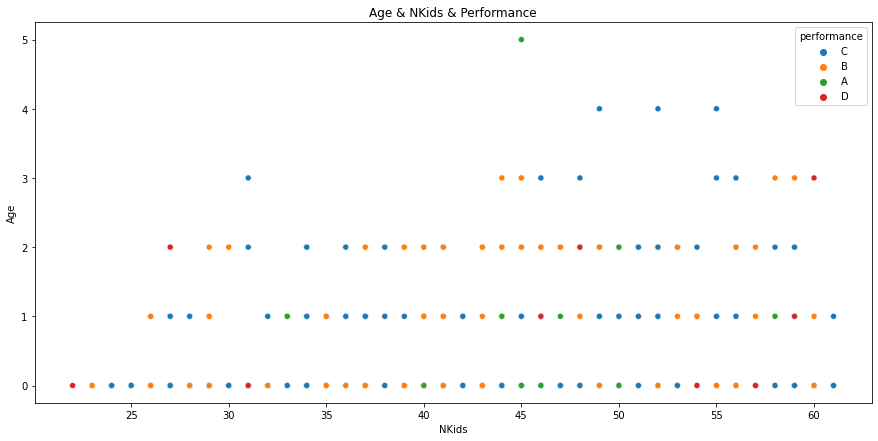

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


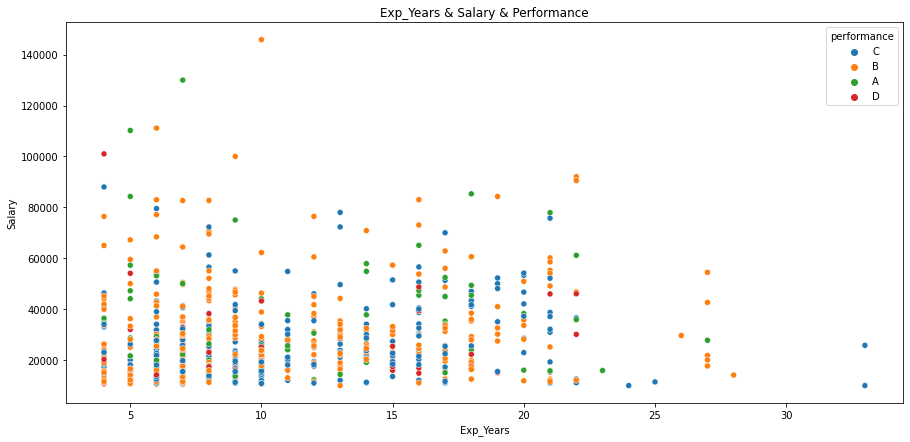

In [128]:
plt.figure(figsize=(10,5))
plt.xlim(0,35)
plt.ylabel('Experience Years')
sns.boxplot(table().expyears)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,80)
plt.ylabel('Age')
sns.boxplot(table().age)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,170000)
plt.ylabel('Salary')
sns.boxplot(table().salary)
plt.show()


plt.figure(figsize=(15,7))
plt.title('Age & NKids & Performance')
plt.xlabel('NKids')
plt.ylabel('Age')
sns.scatterplot(table().age,table().nkids,table().performance)
plt.show()

plt.figure(figsize=(15,7))
plt.title('Exp_Years & Salary & Performance')
plt.xlabel('Exp_Years')
plt.ylabel('Salary')
sns.scatterplot(table().expyears,table().salary,table().performance)
plt.show()

## **Encoding the features as numbers**

In [129]:
hr_data_1=table()

In [130]:
ce_ord = ce.OneHotEncoder(cols = ['emp_class', 'gender', 'department','gspecial', 'sub_division', 'jobtitle', 'rank', 'servstatus', 'mstatue','degree'])

hr_data_2=ce_ord.fit_transform(hr_data_1)

In [131]:
hr_data_2

,emp_class_1,emp_class_2,emp_class_3,gender_1,gender_2,department_1,department_2,department_3,department_4,department_5,...,mstatue_2,mstatue_3,mstatue_4,nkids,salary,degree_1,degree_2,degree_3,degree_4,performance
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,12500,1,0,0,0,C
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,36534,0,1,0,0,C
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,46746,0,1,0,0,B
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,61145,0,1,0,0,A
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,11000,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,11000,1,0,0,0,D
1049,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,12600,1,0,0,0,B
1050,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,23000,0,1,0,0,C
1051,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,11550,1,0,0,0,B


# **Train-Test Split**

In [132]:
def hr_data_X_Y():
    X= hr_data_2.iloc[:, :-1]
    y= hr_data_2.performance
    return X,y
    
hr_data_X_Y()

(      emp_class_1  emp_class_2  emp_class_3  gender_1  gender_2  department_1  \
 0               1            0            0         1         0             1   
 1               0            1            0         1         0             1   
 2               0            0            1         0         1             1   
 3               0            1            0         1         0             0   
 4               1            0            0         1         0             0   
 ...           ...          ...          ...       ...       ...           ...   
 1048            1            0            0         0         1             0   
 1049            1            0            0         0         1             0   
 1050            0            1            0         0         1             0   
 1051            1            0            0         1         0             0   
 1052            1            0            0         1         0             0   
 
       departm

In [133]:
def hr_data_split():

    X,y = hr_data_X_Y()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [134]:
data_hr=hr_data_split()

data_hr

(      emp_class_1  emp_class_2  emp_class_3  gender_1  gender_2  department_1  \
 418             1            0            0         1         0             0   
 486             0            1            0         1         0             0   
 190             0            1            0         0         1             0   
 839             1            0            0         1         0             0   
 715             0            1            0         0         1             0   
 ...           ...          ...          ...       ...       ...           ...   
 1033            1            0            0         1         0             0   
 763             1            0            0         0         1             0   
 835             1            0            0         0         1             0   
 559             0            1            0         0         1             0   
 684             0            0            1         0         1             0   
 
       departm

# **1. Decision trees**

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 

In [136]:
def dt_hr_data_default():
  X_train, X_test, y_train, y_test=data_hr
  tree = DecisionTreeClassifier(random_state=0) 
  tree.fit(X_train, y_train) 
  print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [137]:
dt_hr_data_default()

Accuracy on test set: 0.450


In [138]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [139]:
def dt_hr_data():

  tree = DecisionTreeClassifier()
  X_train, X_test, y_train, y_test=data_hr
  x=[]
  y=[]
  n=1

  while n<15:
    tree = DecisionTreeClassifier(max_depth=n, random_state=0) 
    tree.fit(X_train, y_train) 
    x.append(tree.score(X_train, y_train))
    y.append(tree.score(X_test, y_test))
    print("max_depth: {:.0f}".format(n))
    print(x)
    print(y)
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
    n=n+1
  return x,y,tree

In [140]:
x1,y1,z1=dt_hr_data()

x1

y1

z1

max_depth: 1
[0.47624703087885983]
[0.5213270142180095]
Accuracy on training set: 0.476
Accuracy on test set: 0.521
max_depth: 2
[0.47624703087885983, 0.49524940617577196]
[0.5213270142180095, 0.4834123222748815]
Accuracy on training set: 0.495
Accuracy on test set: 0.483
max_depth: 3
[0.47624703087885983, 0.49524940617577196, 0.5095011876484561]
[0.5213270142180095, 0.4834123222748815, 0.4834123222748815]
Accuracy on training set: 0.510
Accuracy on test set: 0.483
max_depth: 4
[0.47624703087885983, 0.49524940617577196, 0.5095011876484561, 0.5190023752969121]
[0.5213270142180095, 0.4834123222748815, 0.4834123222748815, 0.4834123222748815]
Accuracy on training set: 0.519
Accuracy on test set: 0.483
max_depth: 5
[0.47624703087885983, 0.49524940617577196, 0.5095011876484561, 0.5190023752969121, 0.5463182897862233]
[0.5213270142180095, 0.4834123222748815, 0.4834123222748815, 0.4834123222748815, 0.46919431279620855]
Accuracy on training set: 0.546
Accuracy on test set: 0.469
max_depth: 6
[0

DecisionTreeClassifier(max_depth=14, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


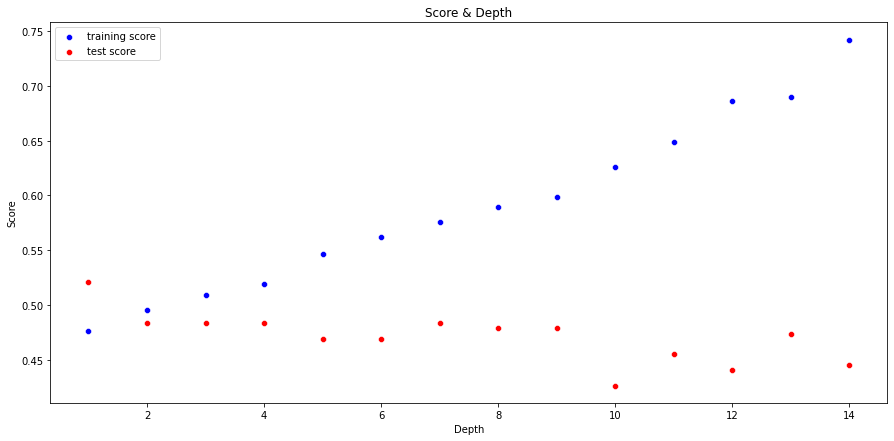

In [141]:
plt.figure(figsize=(15,7))
plt.title('Score & Depth')
plt.xlabel('Depth')
plt.ylabel('Score')
depth=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
sns.scatterplot(depth,x1,color='blue',label="training score")
sns.scatterplot(depth,y1,color='red',label="test score")
plt.show()

# **2. Random Forest**

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
def rf_default():
  X_train, X_test, y_train, y_test=data_hr
  forest = RandomForestClassifier(random_state=0)
  forest.fit(X_train, y_train) 
  print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [144]:
rf_default()

Accuracy on test set: 0.441


In [145]:
def rf_train():
  
  X_train, X_test, y_train, y_test=data_hr
  z=[]
  v=[]
  n=1
  while n<100:
    forest = RandomForestClassifier(n_estimators=n, random_state=0)
    forest.fit(X_train, y_train) 
    z.append(forest.score(X_train, y_train))
    v.append(forest.score(X_test, y_test))
    print("n_estimators: {:.0f}".format(n))
    print(z)
    print(v)
    print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
    n=n+5
  return z,v,forest

In [146]:
x_rf1,y_rf1,z_rf1= rf_train()

x_rf1

y_rf1

z_rf1

n_estimators: 1
[0.7850356294536817]
[0.3744075829383886]
Accuracy on training set: 0.785
Accuracy on test set: 0.374
n_estimators: 6
[0.7850356294536817, 0.9560570071258907]
[0.3744075829383886, 0.44075829383886256]
Accuracy on training set: 0.956
Accuracy on test set: 0.441
n_estimators: 11
[0.7850356294536817, 0.9560570071258907, 0.9845605700712589]
[0.3744075829383886, 0.44075829383886256, 0.4597156398104265]
Accuracy on training set: 0.985
Accuracy on test set: 0.460
n_estimators: 16
[0.7850356294536817, 0.9560570071258907, 0.9845605700712589, 0.9904988123515439]
[0.3744075829383886, 0.44075829383886256, 0.4597156398104265, 0.4312796208530806]
Accuracy on training set: 0.990
Accuracy on test set: 0.431
n_estimators: 21
[0.7850356294536817, 0.9560570071258907, 0.9845605700712589, 0.9904988123515439, 0.997624703087886]
[0.3744075829383886, 0.44075829383886256, 0.4597156398104265, 0.4312796208530806, 0.4549763033175355]
Accuracy on training set: 0.998
Accuracy on test set: 0.455
n_es

RandomForestClassifier(n_estimators=96, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


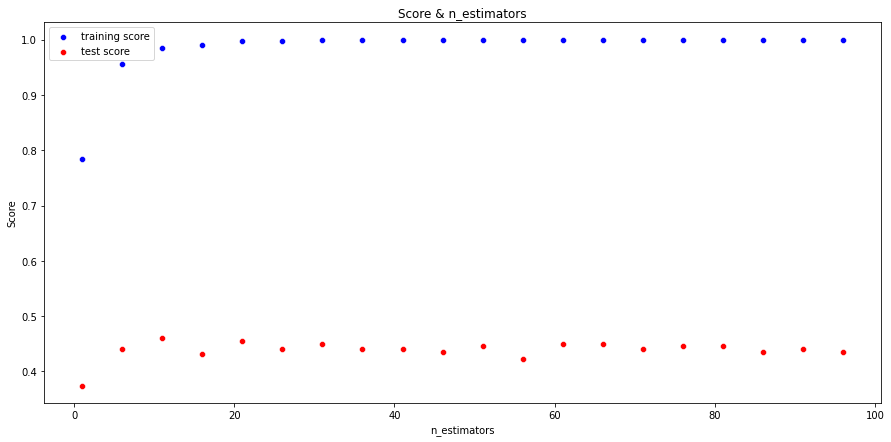

In [147]:
plt.figure(figsize=(15,7))
plt.title('Score & n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')
depth=np.array([1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96])
sns.scatterplot(depth,x_rf1,color='blue',label="training score")
sns.scatterplot(depth,y_rf1,color='red',label="test score")
plt.show()

## **Feature importances**

***(1) Decision Tree classifiers***

In [148]:
tree=z1

In [149]:
tree.feature_importances_

array([0.00567876, 0.00701403, 0.        , 0.        , 0.0058796 ,
       0.00581958, 0.01105795, 0.00564677, 0.        , 0.01824141,
       0.        , 0.00930637, 0.        , 0.        , 0.        ,
       0.00652498, 0.01750919, 0.        , 0.        , 0.        ,
       0.        , 0.00614289, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00923928, 0.        , 0.00290979,
       0.        , 0.0167351 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00720576,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00387972, 0.        , 0.        , 0.        , 0.     

Text(0.5, 0, 'Decision Tree Feature Importance')

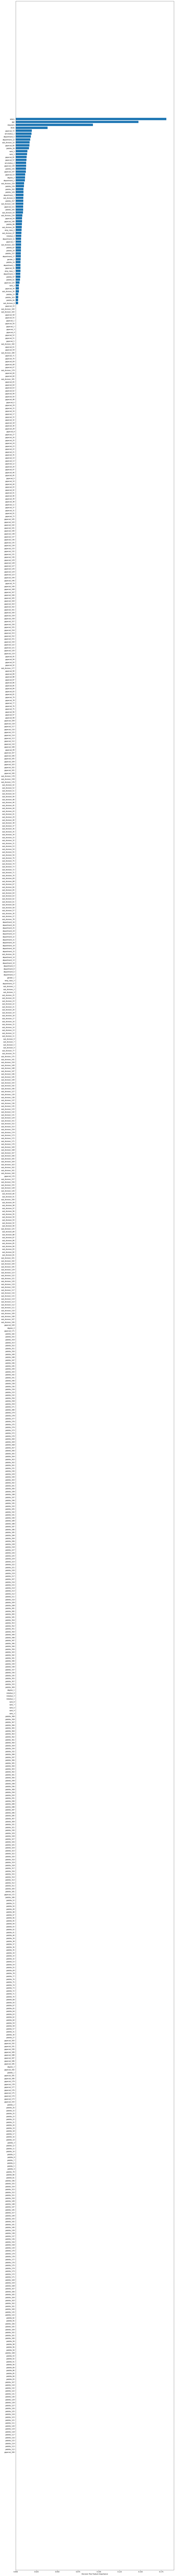

In [150]:
sorted_idx = tree.feature_importances_.argsort()
f, ax = plt.subplots(figsize=(18,300))
plt.barh(hr_data_2.columns[sorted_idx], tree.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

***(2) Random Forest classifiers***

In [151]:
forest=z_rf1

In [152]:
forest.feature_importances_

array([7.01943422e-03, 6.54891067e-03, 3.33109398e-03, 1.03945697e-02,
       1.06633260e-02, 6.64445185e-03, 5.57254979e-03, 5.22063769e-03,
       3.84094300e-03, 7.19758091e-03, 2.42669918e-04, 3.47593502e-03,
       1.00691502e-03, 0.00000000e+00, 2.64339058e-03, 3.02876321e-03,
       2.49377122e-03, 1.41585461e-03, 2.56095565e-03, 5.56187566e-03,
       4.81796769e-03, 4.02449558e-03, 3.72906019e-04, 2.68877159e-03,
       7.85253014e-04, 1.72868529e-04, 9.02549358e-04, 4.35776493e-03,
       1.31823796e-03, 2.39400236e-03, 4.61375356e-04, 4.23885655e-04,
       2.72697155e-03, 8.10189306e-04, 1.99250534e-03, 1.64045496e-03,
       3.65574651e-03, 1.46605210e-03, 3.49442284e-03, 4.77310410e-03,
       2.70529806e-03, 3.89473687e-03, 3.03140633e-04, 2.26562255e-04,
       2.11830819e-04, 4.77724347e-04, 1.44255368e-03, 0.00000000e+00,
       1.12675532e-03, 1.70623129e-03, 1.22583350e-03, 1.81008813e-03,
       8.83660491e-04, 4.01282974e-04, 8.95716146e-04, 5.47163487e-04,
      

Text(0.5, 0, 'Random Forest Feature Importance')

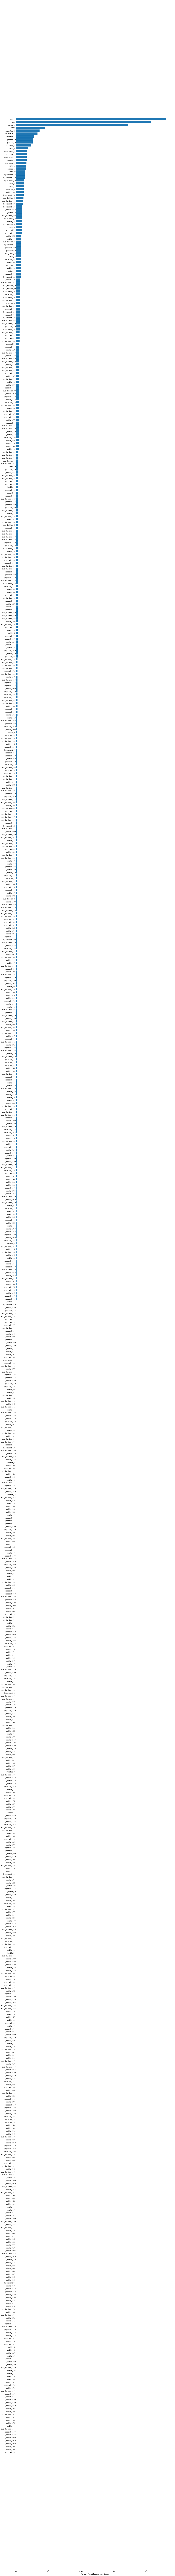

In [153]:
sorted_idx = forest.feature_importances_.argsort()
f, ax = plt.subplots(figsize=(18,300))
plt.barh(hr_data_2.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# **3. Naive Bayes**

In [154]:
from sklearn.naive_bayes import GaussianNB

In [155]:
def gnb_hr_data_score():
    X_train, X_test, y_train, y_test=data_hr
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Accuracy of GNB on HR Data. training set: {:.2f}".format(gnb.score(X_train, y_train)))
    print("Accuracy of GNB on HR Data. test set: {:.2f}".format(gnb.score(X_test, y_test)))

In [156]:
gnb_hr_data_score()

Accuracy of GNB on HR Data. training set: 0.44
Accuracy of GNB on HR Data. test set: 0.38


In [157]:
def GridSearchCV_gnb():
  X_train, X_test, y_train, y_test=data_hr
  param_grid_nb = { 'var_smoothing': np.logspace(0,-9, num=100) }
  nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
  nbModel_grid.fit(X_train, y_train)
  print(nbModel_grid.best_estimator_)

In [158]:
GridSearchCV_gnb()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=5.336699231206302e-09)


In [159]:
def gnb_hr_data_GridCV_score():
    X_train, X_test, y_train, y_test=data_hr
    gnb = GaussianNB(var_smoothing=5.336699231206302e-09)
    gnb.fit(X_train, y_train)
    print("Accuracy of GNB_GridCV on HR Data. training set: {:.2f}".format(gnb.score(X_train, y_train)))
    print("Accuracy of GNB_GridCV on HR Data. test set: {:.2f}".format(gnb.score(X_test, y_test)))
    return gnb

In [160]:
gnb_hr_data_GridCV_score()

Accuracy of GNB_GridCV on HR Data. training set: 0.47
Accuracy of GNB_GridCV on HR Data. test set: 0.50


GaussianNB(var_smoothing=5.336699231206302e-09)

In [161]:
def gnb_hr_data_GridCV_predict():
  X_train, X_test, y_train, y_test=data_hr
  gnb = GaussianNB(var_smoothing=5.336699231206302e-09)
  gnb.fit(X_train, y_train)
  gnb.predict(X_test)
  return gnb.predict(X_test)

In [162]:
gnb_hr_data_GridCV_predict()

array(['C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'C', 'C', 'B',
       'C', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'C', 'C', 'C',
       'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C',
       'A', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'B', 'A',
       'B', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'C',
       'C', 'B', 'A', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'B', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'C',
       'C', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'C',
       'B', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'B',
       'C', 'C', 'A', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C',
       'C', 'A', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'C', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C

# **4. KNeighborsClassifier**

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
def knn_hr_data(n):
    X_train, X_test, y_train, y_test=data_hr
    model = KNeighborsClassifier (n_neighbors = n)
    model.fit(X_train, y_train)
    
    return model

In [165]:
def knn_hr_data_predict(n):
    X_train, X_test, y_train, y_test=data_hr
    knn = knn_hr_data(n)
    return knn.predict(X_test)

In [166]:
knn_hr_data_predict(4)

array(['C', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'B',
       'B', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'C',
       'C', 'B', 'C', 'B', 'C', 'A', 'C', 'B', 'B', 'B', 'C', 'D', 'C',
       'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'B', 'B', 'C', 'B',
       'C', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'A',
       'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'B', 'C',
       'C', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'D', 'C',
       'C', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'B',
       'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'C', 'B', 'C',
       'C', 'B', 'A', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'B', 'B',
       'B', 'A', 'C', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'B',
       'B', 'C', 'A', 'D', 'B', 'A', 'D', 'C', 'D', 'C', 'B', 'D', 'B',
       'A', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C

In [167]:
def knn_hr_data_score(n):
    X_train, X_test, y_train, y_test=data_hr
    knn = knn_hr_data(n)
    print("Accuracy of KNN on HR Data. training set: {:.2f}".format(knn.score(X_train, y_train)))
    print("Accuracy of KNN on HR Data. test set: {:.2f}".format(knn.score(X_test, y_test)))

In [168]:
knn_hr_data_score(4)

Accuracy of KNN on HR Data. training set: 0.65
Accuracy of KNN on HR Data. test set: 0.46


In [169]:
def GridSearchCV_KNN():
  X_train, X_test, y_train, y_test=data_hr
  
  knn = KNeighborsClassifier()
  k_range = list(range(1, 50))
  param_grid = dict(n_neighbors=k_range)
    
  # defining parameter range
  grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
    
  # fitting the model for grid search
  grid_search=grid.fit(X_train, y_train)

  print(grid_search.best_params_)

  accuracy = grid_search.best_score_ *100
  print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

  return

In [170]:
GridSearchCV_KNN()

Fitting 10 folds for each of 49 candidates, totalling 490 fits
{'n_neighbors': 13}
Accuracy for our training dataset with tuning is : 49.77%


In [171]:
knn_hr_data_score(13)
#Grid_CV_KNN

Accuracy of KNN on HR Data. training set: 0.56
Accuracy of KNN on HR Data. test set: 0.49


In [172]:
knn_hr_data_predict(13)

array(['C', 'C', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B',
       'B', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'C',
       'C', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C',
       'C', 'C', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C',
       'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C',
       'C', 'C', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C',
       'C', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'B',
       'C', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'B',
       'C', 'B', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'B', 'B',
       'C', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'C', 'B',
       'B', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C',
       'B', 'B', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C

# **5. SVC**

In [173]:
def SVC_hr_data_predict():
  X_train, X_test, y_train, y_test=data_hr
  svc = SVC()
  svc.fit(X_train, y_train)
  print("Accuracy of SVC on training set: {:.2f}".format(svc.score(X_train, y_train)))
  print("Accuracy of SVC on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [174]:
SVC_hr_data_predict()

Accuracy of SVC on training set: 0.47
Accuracy of SVC on test set: 0.50


In [175]:
def GridSearchCV_SVC():
  X_train, X_test, y_train, y_test=data_hr
  svc2 = SVC()
  svc2.fit(X_train, y_train)
  param_grid = {'C':[1,2],'gamma':[0.1,0.01], 'kernel':['rbf']}
  grid = GridSearchCV(SVC() ,param_grid,refit = True, verbose=1)
  grid.fit(X_train,y_train)
  grid.best_params_
  print(grid.best_params_)

In [176]:
GridSearchCV_SVC()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [177]:
def SVC_hr_data_predict_gridcv():
  X_train, X_test, y_train, y_test=data_hr
  svc = SVC(C=2, gamma=0.01, kernel='rbf')
  svc.fit(X_train, y_train)
  print("Accuracy of SVC_GridCV on training set: {:.2f}".format(svc.score(X_train, y_train)))
  print("Accuracy of SVC_GridCV on test set: {:.2f}".format(svc.score(X_test, y_test)))
  return

In [178]:
SVC_hr_data_predict_gridcv()

Accuracy of SVC_GridCV on training set: 0.97
Accuracy of SVC_GridCV on test set: 0.53


In [179]:
def svc_hr_data_GridCV_predict():
  X_train, X_test, y_train, y_test=data_hr
  svc = SVC(C=2, gamma=0.01, kernel='rbf')
  svc.fit(X_train, y_train)
  svc.predict(X_test)
  return svc.predict(X_test)

In [180]:
svc_hr_data_GridCV_predict()

array(['B', 'B', 'D', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'B',
       'B', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'C',
       'C', 'B', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B', 'B', 'D', 'B',
       'C', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'C', 'B', 'C', 'B', 'B', 'C', 'D', 'B', 'C', 'B', 'C', 'B',
       'B', 'A', 'D', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C',
       'B', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'C', 'A', 'C',
       'C', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'A', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'C',
       'B', 'B', 'C', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'C', 'B', 'D', 'B', 'B', 'B', 'B', 'A', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B

# **6. Clustering**

In [181]:
hrdata33 = pd.read_csv('/content/data_sets 2.csv')

print(hrdata33)

       emp_class   gender                                 department  \
0        พนักงาน  เพศหญิง               Food & Beverage (Department)   
1     หัวหน้างาน  เพศหญิง               Food & Beverage (Department)   
2      ผู้จัดการ   เพศชาย               Food & Beverage (Department)   
3     หัวหน้างาน  เพศหญิง          Finance & Accounting (Department)   
4        พนักงาน  เพศหญิง                       Kitchen (Department)   
...          ...      ...                                        ...   
1048     พนักงาน   เพศชาย     Japanese Restaurant Group (Department)   
1049     พนักงาน   เพศชาย             IMPACT Lake Front (Department)   
1050  หัวหน้างาน   เพศชาย  Chinese Restaurant (Kitchen) (Department)   
1051     พนักงาน  เพศหญิง     Japanese Restaurant Group (Department)   
1052     พนักงาน  เพศหญิง             IMPACT Lake Front (Department)   

                             sub_division  \
0                                 Steward   
1                          Administration   


In [182]:
def table2():

  data = np.c_[hrdata33]

  return pd.DataFrame(data, columns=hrdata33.columns.values)

table2()

,emp_class,gender,department,sub_division,gspecial,jobtitle,rank,servstatus,age,expyears,mstatue,nkids,salary,degree,performance
0,พนักงาน,เพศหญิง,Food & Beverage (Department),Steward,Steward,Steward Attendant,10,พ้นสภาพ,61,22,โสด,1,12500,NaN,3.0
1,หัวหน้างาน,เพศหญิง,Food & Beverage (Department),Administration,Administration,Supervisor - F&B Admin,7,พ้นสภาพ,44,22,โสด,0,36534,ปริญญาตรี,3.0
2,ผู้จัดการ,เพศชาย,Food & Beverage (Department),Banquet - Support,Banquet - Support,Manager - Banquet Supporting,5,ปัจจุบัน,46,22,โสด,0,46746,ปริญญาตรี,2.0
3,หัวหน้างาน,เพศหญิง,Finance & Accounting (Department),Store,Store,Chief Store,6,พ้นสภาพ,59,22,โสด,0,61145,ปริญญาตรี,1.0
4,พนักงาน,เพศหญิง,Kitchen (Department),Preparation Kitchen,Preparation Kitchen,Commis II,10,พ้นสภาพ,53,21,โสด,0,11000,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,พนักงาน,เพศชาย,Japanese Restaurant Group (Department),Tsubohachi - Kitchen (Nihonmachi),Tsubohachi - Kitchen (Nihonmachi),Commis II,10,พ้นสภาพ,31,4,โสด,0,11000,NaN,4.0
1049,พนักงาน,เพศชาย,IMPACT Lake Front (Department),ISAN@ARENA - Kitchen,ISAN@ARENA - Kitchen,Commis III,11,ปัจจุบัน,28,4,โสด,0,12600,NaN,2.0
1050,หัวหน้างาน,เพศชาย,Chinese Restaurant (Kitchen) (Department),Chinese Banquet Kitchen,Chinese Banquet Kitchen,Chopper II,7,พ้นสภาพ,27,4,โสด,0,23000,ปริญญาตรี,3.0
1051,พนักงาน,เพศหญิง,Japanese Restaurant Group (Department),Tsubohachi - Service(The Promenade),Tsubohachi - Service(The Promenade),Service,10,ปัจจุบัน,23,4,โสด,0,11550,NaN,2.0


In [183]:
hr_data_33=table2()

In [184]:
ce_ord = ce.OneHotEncoder(cols = ['emp_class', 'gender', 'department','gspecial', 'sub_division', 'jobtitle', 'rank', 'servstatus', 'mstatue','degree'])
hr_data_22=ce_ord.fit_transform(hr_data_33)

In [185]:
hr_data_22

,emp_class_1,emp_class_2,emp_class_3,gender_1,gender_2,department_1,department_2,department_3,department_4,department_5,...,mstatue_2,mstatue_3,mstatue_4,nkids,salary,degree_1,degree_2,degree_3,degree_4,performance
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,12500,1,0,0,0,3.0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,36534,0,1,0,0,3.0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,46746,0,1,0,0,2.0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,61145,0,1,0,0,1.0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,11000,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,11000,1,0,0,0,4.0
1049,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,12600,1,0,0,0,2.0
1050,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,23000,0,1,0,0,3.0
1051,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,11550,1,0,0,0,2.0


In [186]:
def hr_data_X_Y_22():
    X= hr_data_22.iloc[:, :-1]
    y= hr_data_22.performance
    return X,y
    
hr_data_X_Y_22()

(      emp_class_1  emp_class_2  emp_class_3  gender_1  gender_2  department_1  \
 0               1            0            0         1         0             1   
 1               0            1            0         1         0             1   
 2               0            0            1         0         1             1   
 3               0            1            0         1         0             0   
 4               1            0            0         1         0             0   
 ...           ...          ...          ...       ...       ...           ...   
 1048            1            0            0         0         1             0   
 1049            1            0            0         0         1             0   
 1050            0            1            0         0         1             0   
 1051            1            0            0         1         0             0   
 1052            1            0            0         1         0             0   
 
       departm

In [187]:
def scaler_X_Y():
  X,y=hr_data_X_Y_22()
  scaler = StandardScaler()
  scaler.fit(X)
  X_scaled = scaler.transform(X)
  return X_scaled,y

In [188]:
scaler_X_Y()

(array([[ 0.74987635, -0.60185139, -0.32213908, ..., -1.08633523,
         -0.07570112, -0.03083132],
        [-1.33355319,  1.66153973, -0.32213908, ...,  0.92052617,
         -0.07570112, -0.03083132],
        [-1.33355319, -0.60185139,  3.10424929, ...,  0.92052617,
         -0.07570112, -0.03083132],
        ...,
        [-1.33355319,  1.66153973, -0.32213908, ...,  0.92052617,
         -0.07570112, -0.03083132],
        [ 0.74987635, -0.60185139, -0.32213908, ..., -1.08633523,
         -0.07570112, -0.03083132],
        [ 0.74987635, -0.60185139, -0.32213908, ..., -1.08633523,
         -0.07570112, -0.03083132]]), 0       3.0
 1       3.0
 2       2.0
 3       1.0
 4       3.0
        ... 
 1048    4.0
 1049    2.0
 1050    3.0
 1051    2.0
 1052    2.0
 Name: performance, Length: 1053, dtype: object)

In [189]:
X_scale,y_scale =scaler_X_Y()

In [190]:
pca = PCA()

pca.fit(X_scale)

X_pca = pca.transform(X_scale)
print("Original shape: {}".format(str(X_scale.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1053, 800)
Reduced shape: (1053, 800)


In [191]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.31667097  0.22854199  0.17482044 ...  0.2945942  -0.03471546
  -0.01153398]
 [ 0.06116204  0.09270619 -0.24092788 ...  0.14020706  0.03244009
   0.08184432]
 [ 0.01494386 -0.09667286  0.1217697  ... -0.07896704  0.02952509
   0.07788869]
 ...
 [ 0.          0.00984359 -0.03710608 ... -0.05564562 -0.0084056
   0.23362463]
 [ 0.         -0.00594717 -0.03465447 ... -0.00338813 -0.0005118
   0.02491998]
 [ 0.         -0.00835121 -0.01025806 ...  0.01456925  0.00220077
   0.47886436]]


In [192]:
print(pca.explained_variance_)

[7.36223321e+00 5.02063201e+00 4.82053491e+00 4.49836192e+00
 4.46014300e+00 4.40039199e+00 4.25285058e+00 4.23366987e+00
 4.15825769e+00 4.10385198e+00 4.03695302e+00 4.03214639e+00
 4.01709218e+00 4.00620864e+00 3.99263577e+00 3.97332814e+00
 3.95771904e+00 3.94634476e+00 3.91435225e+00 3.89341027e+00
 3.84150750e+00 3.79261535e+00 3.71060283e+00 3.67395426e+00
 3.64767200e+00 3.61055508e+00 3.57279690e+00 3.53922415e+00
 3.46207196e+00 3.42596576e+00 3.32942432e+00 3.32867719e+00
 3.29118921e+00 3.26722508e+00 3.20525738e+00 3.18071860e+00
 3.13768662e+00 3.08334497e+00 3.06977408e+00 3.06625223e+00
 3.04840543e+00 3.04046114e+00 3.03903458e+00 3.03593032e+00
 3.03056448e+00 3.02841710e+00 3.02706765e+00 3.02548636e+00
 3.02460242e+00 3.02060316e+00 3.01899376e+00 3.01827322e+00
 3.01596696e+00 3.01471089e+00 3.01317761e+00 3.01301947e+00
 3.01274466e+00 3.01113551e+00 3.01105295e+00 3.01058711e+00
 3.00983631e+00 3.00954274e+00 3.00919923e+00 3.00884878e+00
 3.00863130e+00 3.008229

In [193]:
print(pca.explained_variance_ratio_.sum())

0.9999999999999999


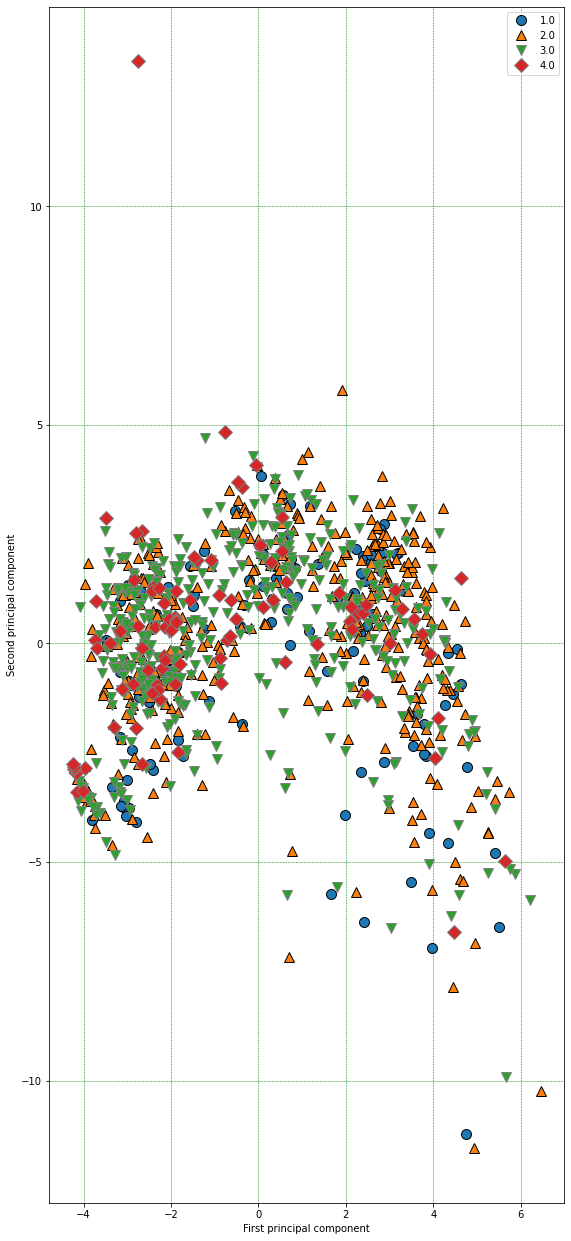

In [194]:
plt.figure(figsize=(22, 22))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_scale)
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [195]:
kmeans = KMeans(n_clusters = 4, n_init=100,random_state=17)
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeans

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

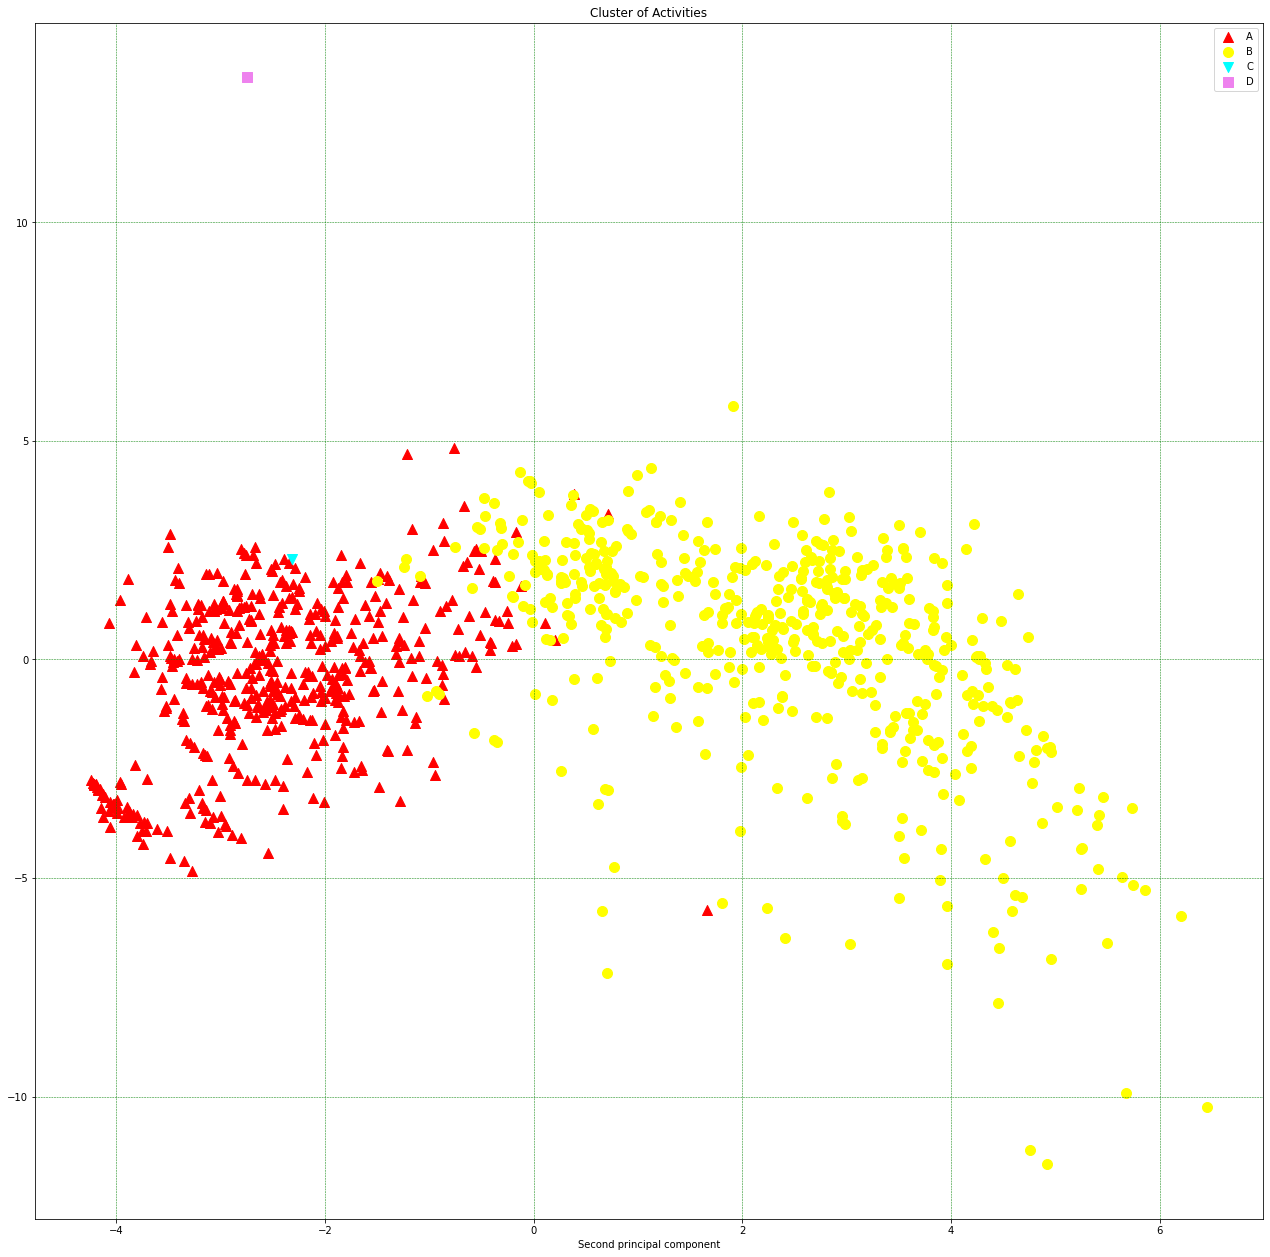

In [196]:
plt.figure(figsize=(22, 22))
plt.scatter(X_pca[kmeans.labels_==0,0],X_pca[kmeans.labels_==0,1], s=100, c='red', marker = '^', label='A')
plt.scatter(X_pca[kmeans.labels_==1,0],X_pca[kmeans.labels_==1,1], s=100, c='yellow', marker = 'o', label='B')
plt.scatter(X_pca[kmeans.labels_==2,0],X_pca[kmeans.labels_==2,1], s=100, c='aqua', marker = 'v', label='C')
plt.scatter(X_pca[kmeans.labels_==3,0],X_pca[kmeans.labels_==3,1], s=100, c='violet', marker = 's', label='D')
plt.title('Cluster of Activities')
plt.xlabel('First principal component')
plt.xlabel('Second principal component')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [197]:
tab = pd.crosstab(y_kmeans,columns='cluster',margins=True)
tab.index = ['1.0','2.0','3.0','4.0','all']
tab.columns = ['Kmean_Cluster']+['all']
tab

,Kmean_Cluster,all
1.0,510,510
2.0,541,541
3.0,1,1
4.0,1,1
all,1053,1053


In [198]:
tab = pd.crosstab(hr_data_22.performance,columns='cluster',margins=True)
tab.index = ['1.0','2.0','3.0','4.0','all']
tab.columns = ['Kmean_cluster']+['all']
tab

,Kmean_cluster,all
1.0,110,110
2.0,421,421
3.0,431,431
4.0,91,91
all,1053,1053


# **7. Regression**

# Linear Regression

In [199]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 

In [200]:
X1, y1 = hr_data_X_Y_22()

X_train11, X_test11, y_train11, y_test11 = train_test_split(X1, y1, random_state=0)
 
lr = LinearRegression().fit(X_train11, y_train11)

In [201]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_)) 

lr.coef_: [-1.17041154e+08 -6.21966576e+07 -6.23213292e+07 -6.55090492e+06
 -6.55090477e+06  6.97379152e+06 -2.20205743e+06 -3.76441549e+06
  2.86813321e+05  8.87993944e+05  3.45486702e+07 -3.56607896e+06
  1.78808605e+07  1.09267668e+07 -6.76440562e+05  7.64077446e+05
  1.56859585e+05 -7.76134228e+05 -2.32266767e+06  1.40730943e+06
  8.59725174e+05  4.97743674e+06 -3.60453640e+06  1.40730912e+06
  4.57425826e+06 -1.02119838e+06  1.75620443e+05  8.63452011e+05
 -1.48796029e+04  1.43556172e+06  5.44767819e+05  1.64443145e+06
 -2.97947330e+06 -1.78022569e+06 -2.98063936e+06  1.48924037e+06
  2.38920182e+06  3.57777943e+05  1.06826215e+05 -2.97959305e+06
  6.29832629e+04  1.08743662e+05 -1.16450456e+07  1.95526158e+06
 -6.70499834e+06  1.50393659e+06  2.38865926e+06  2.26280293e+02
  1.50419677e+06  4.55949574e+05  1.24777395e+05  2.38915887e+06
  4.27443103e+05  1.50446236e+06  6.75003845e+05  1.66817714e+06
  1.48898536e+06 -1.96617534e+05  1.50421500e+06  2.38900139e+06
  2.77662594e+0

In [202]:
print("Training set score: {:.2f}".format(lr.score(X_train11, y_train11))) 
print("Test set score: {:.2f}".format(lr.score(X_test11, y_test11))) 

Training set score: 0.66
Test set score: -7758613524731.82


# Ridge Regression

In [203]:
ridge = Ridge().fit(X_train11, y_train11)

In [204]:
print("Training set score: {:.2f}".format(ridge.score(X_train11, y_train11))) 
print("Test set score: {:.2f}".format(ridge.score(X_test11, y_test11)))

Training set score: 0.60
Test set score: -0.07


# Lasso Regression - Boston dataset

In [205]:
from sklearn.linear_model import Lasso 

In [206]:
lasso = Lasso().fit(X_train11, y_train11)

In [207]:
print("Training set score: {:.2f}".format(lasso.score(X_train11, y_train11))) 
print("Test set score: {:.2f}".format(lasso.score(X_test11, y_test11))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

Training set score: 0.04
Test set score: 0.03
Number of features used: 1


In [208]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train11, y_train11) 
print("Training set score: {:.2f}".format(lasso001.score(X_train11, y_train11))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test11, y_test11))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0))) 

Training set score: 0.10
Test set score: 0.04
Number of features used: 11


# **Evaluation**

# *CONFUSION MATRIX*

In [209]:
from sklearn.metrics import confusion_matrix

In [210]:
X_train1, X_test1, y_train1, y_test1=data_hr

In [211]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

1. Decision trees

In [212]:
tree1 = DecisionTreeClassifier()
tree1 = DecisionTreeClassifier(max_depth=4, random_state=0) 
tree1.fit(X_train1, y_train1)
pred_tree=tree1.predict(X_test1)

print("Test score Decision Tree: {:.2f}".format(tree1.score(X_test1, y_test1)))

Test score Decision Tree: 0.48


In [213]:
confusion1 = confusion_matrix(y_test1, pred_tree)
print("Confusion matrix Decision Tree:\n{}".format(confusion1))

Confusion matrix Decision Tree:
[[ 0  2 22  0]
 [ 0 30 51  0]
 [ 0 12 72  0]
 [ 0  4 18  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


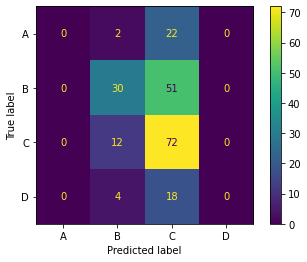

In [214]:
plot_confusion_matrix(tree1, X_test1, y_test1)  
plt.show()

2. Random Forest classifiers

In [215]:
forest2 = RandomForestClassifier(n_estimators=21, random_state=0)
forest2.fit(X_train1, y_train1) 
pred_rf=forest2.predict(X_test1)
print("Test score Random forest: {:.2f}".format(forest2.score(X_test1, y_test1)))

Test score Random forest: 0.45


In [216]:
confusion2 = confusion_matrix(y_test1, pred_rf)
print("Confusion matrix Random Forest:\n{}".format(confusion2))

Confusion matrix Random Forest:
[[ 2 11 11  0]
 [ 1 49 29  2]
 [ 1 36 43  4]
 [ 0  5 15  2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


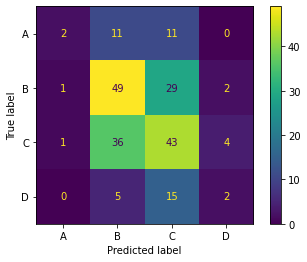

In [217]:
plot_confusion_matrix(forest2, X_test1, y_test1)  
plt.show()

3. Naive Bayes

In [218]:
gnb3 = GaussianNB(var_smoothing=5.336699231206302e-09)
gnb3.fit(X_train1, y_train1)
pred_gnb=gnb3.predict(X_test1)
print("Test score Naive Bayes : {:.2f}".format(gnb3.score(X_test1, y_test1)))

Test score Naive Bayes : 0.50


In [219]:
confusion3 = confusion_matrix(y_test1, pred_gnb)
print("Confusion matrix Naive Bayest:\n{}".format(confusion3))

Confusion matrix Naive Bayest:
[[ 1  4 19  0]
 [ 4 37 40  0]
 [ 0 16 68  0]
 [ 1  5 16  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


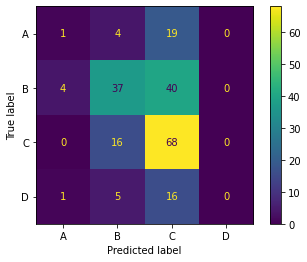

In [220]:
plot_confusion_matrix(gnb3, X_test1, y_test1)  
plt.show()

4. KNeighborsClassifier

In [221]:
knn4 = KNeighborsClassifier (n_neighbors = 13)
knn4.fit(X_train1, y_train1)
pred_knn=knn4.predict(X_test1)
print("Test score KNeighborsClassifier : {:.2f}".format(knn4.score(X_test1, y_test1)))

Test score KNeighborsClassifier : 0.49


In [222]:
confusion4 = confusion_matrix(y_test1, pred_knn)
print("Confusion matrix KNeighborsClassifier:\n{}".format(confusion4))

Confusion matrix KNeighborsClassifier:
[[ 0 16  8  0]
 [ 0 57 24  0]
 [ 0 38 46  0]
 [ 0 13  9  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


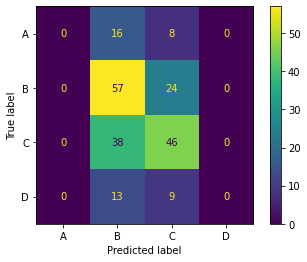

In [223]:
plot_confusion_matrix(knn4, X_test1, y_test1)  
plt.show()

5. SVC

In [224]:
svc5 = SVC(C=2, gamma=0.01, kernel='rbf')
svc5.fit(X_train1, y_train1)
pred_svc=svc5.predict(X_test1)
print("Test score SVC : {:.2f}".format(svc5.score(X_test1, y_test1)))

Test score SVC : 0.53


In [225]:
confusion5 = confusion_matrix(y_test1, pred_svc)
print("Confusion matrix SVC:\n{}".format(confusion5))

Confusion matrix SVC:
[[ 2 21  1  0]
 [ 4 65 11  1]
 [ 3 38 41  2]
 [ 0 14  5  3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


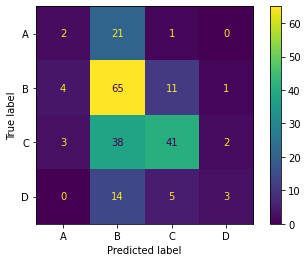

In [226]:
plot_confusion_matrix(svc5, X_test1, y_test1)  
plt.show()

# **Logistic Regression**

In [227]:
logreg100 = LogisticRegression(max_iter=50000).fit(X_train1, y_train1)
print('HR. dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg100.score(X_train1, y_train1)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg100.score(X_test1, y_test1)))

HR. dataset
Accuracy of Logistic regression classifier on training set: 0.48
Accuracy of Logistic regression classifier on test set: 0.53


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


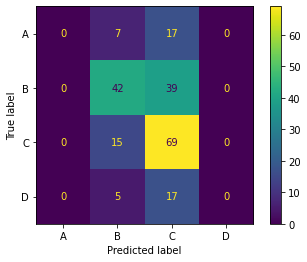

In [228]:
plot_confusion_matrix(logreg100, X_test1, y_test1)  
plt.show()